In [1]:
import pandas as pd
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import seaborn as sns
import re



In [2]:
df=pd.read_csv("./wine/winemag-data-130k-v2.csv")
df=df.iloc[:,1:]
df.head()



,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
df1 = df.drop(['description', 'designation',"province",  "region_1", 'region_2', 'taster_name', 'taster_twitter_handle'], axis="columns")

df1.head()

,country,points,price,title,variety,winery
0,Italy,87,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,87,13.0,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,87,65.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
df1.isnull().sum()


country      63
points        0
price      8996
title         0
variety       1
winery        0
dtype: int64

c:\users\sapfi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\sapfi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


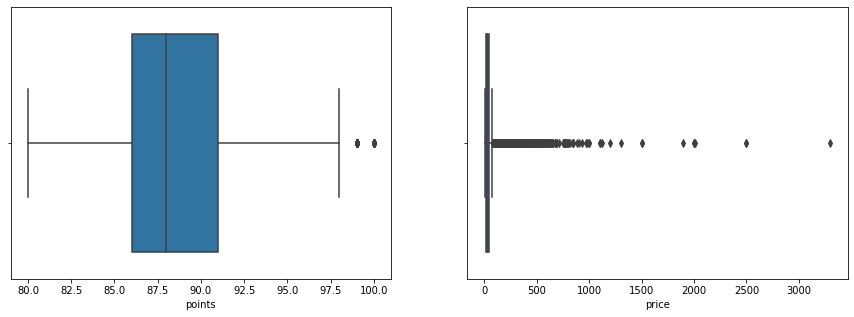

In [5]:



num_data=pd.DataFrame(df1.dtypes[df1.dtypes!="object"]).index

count = 0
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(15,5))
sns.boxplot(df1[num_data[0]],ax=ax[0])
sns.boxplot(df1[num_data[1]],ax=ax[1]);

Подготовим данные:

In [6]:
yearSearch = []    
for value in df1['title']:
    regexresult = re.search(r'19\d{2}|20\d{2}', value)
    if regexresult:
        yearSearch.append(regexresult.group())
    else: yearSearch.append(None)

df1['year'] = yearSearch
# уберем описание, в тех строчках, где нет года

df1['year']=df1.year.fillna("Unknown")
df2 = df1.drop(['title'], axis="columns")

In [7]:
df2

,country,points,price,variety,winery,year
0,Italy,87,NaN,White Blend,Nicosia,2013
1,Portugal,87,15.0,Portuguese Red,Quinta dos Avidagos,2011
2,US,87,14.0,Pinot Gris,Rainstorm,2013
3,US,87,13.0,Riesling,St. Julian,2013
4,US,87,65.0,Pinot Noir,Sweet Cheeks,2012
...,...,...,...,...,...,...
129966,Germany,90,28.0,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
129967,US,90,75.0,Pinot Noir,Citation,2004
129968,France,90,30.0,Gewürztraminer,Domaine Gresser,2013
129969,France,90,32.0,Pinot Gris,Domaine Marcel Deiss,2012


In [8]:
df2 = df2.dropna(subset=["variety"])
df2.year = df2.year.apply(lambda x: x.strip())
year_stats = df2.groupby("year")["year"].agg("count").sort_values(ascending=False)
df2.variety = df2.variety.apply(lambda x: x.strip())

variety_stats = df2.groupby("variety")["variety"].agg("count").sort_values(ascending=False)
variety_stats_less_than_10 = variety_stats[variety_stats <=10]


df2.winery = df2.winery.apply(lambda x: x.strip())

winery_stats = df2.groupby("winery")["winery"].agg("count").sort_values(ascending=False)

winery_stats_less_than_10 = winery_stats[winery_stats <=10]

df2 = df2.dropna(subset=["variety"])
df2.winery = df2.winery.apply(lambda x :"other_winery" if x in winery_stats_less_than_10 else x)
len(df2.winery.unique())
df3=df2.copy()

from sklearn.impute import KNNImputer
knn_imputer=KNNImputer()
df3.price=knn_imputer.fit_transform(df3[["price"]])
data_final= df3.copy()
data_final.head(10)
feature_cols = ["country", "points", "variety","winery", "year"]

y = data_final.price # Target variable

dummy = data_final[feature_cols] 

X_dummy = pd.get_dummies(dummy, prefix="", prefix_sep="", drop_first=True)

X_dummy.head()

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
ls = Lasso(alpha=0.01).fit(X_dummy, y)
model = SelectFromModel(ls, prefit=True)
X_lasso =[column for column in X_dummy.columns if column not in X_dummy.columns[model.get_support()]]
X =X_dummy.drop(X_lasso, axis=1)

X

c:\users\sapfi\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
c:\users\sapfi\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,points,Austria,Bulgaria,Chile,France,Germany,Israel,Italy,New Zealand,South Africa,...,2005,2007,2010,2011,2012,2013,2014,2015,2016,Unknown
0,87,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,87,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,90,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
129967,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129968,90,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
129969,90,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Протестим на моделях:

In [10]:
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
# Define the model
rf_model = RandomForestRegressor(random_state = 1)
# fit model

rf_model.fit(X_train, y_train)
val_predictions = rf_model.predict(X_test)

# Calculating the mean absolute error of Random Forest model on the validation data
rf_val_mae = mean_absolute_error(val_predictions, y_test)
# Calculating the R square
R_squ = rf_model.score(X_test,y_test)

print("Validation MAE for Random Forest Model: {:.1f}".format(rf_val_mae))
print("R2 for LinearRegression Model: {:.2f}".format(R_squ))


Validation MAE for Random Forest Model: 13.4
R2 for LinearRegression Model: 0.31


In [11]:
def predict_price(country, variety, year, points):    
    loc_index = np.where(X_dummy.columns==country)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = points
    
    if loc_index >= 0:
        x[loc_index] = 1
    
    veriety_index = np.where(X.columns==variety)[0][0]
    if veriety_index >= 0:
        x[veriety_index] = 1
    
    year_index = np.where(X.columns==year)[0][0]
    if year_index >= 0:
        x[year_index] = 1
    
           
    return rf_model.predict([x])[0]

In [12]:
predict_price("Italy","Sangiovese","2015", 78)


12.446663934084224

In [13]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [14]:
X_train

,points,Austria,Bulgaria,Chile,France,Germany,Israel,Italy,New Zealand,South Africa,...,2005,2007,2010,2011,2012,2013,2014,2015,2016,Unknown
35956,94,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104748,88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
101219,85,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
82261,92,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36717,84,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128107,85,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
103695,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
860,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15795,94,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [15]:
y_train=y_train.astype('int')
y_train

35956      60
104748     23
101219     25
82261     225
36717      12
         ... 
128107     10
103695     17
860        45
15795     150
121959     22
Name: price, Length: 103976, dtype: int32

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

classes = list(y_train.unique())
class_count = len(classes)

model = KNeighborsClassifier(n_neighbors=class_count)
model.fit(X_train, y_train)
val_predictions = model.predict(X_test)

val_mae = mean_absolute_error(val_predictions, y_test)
R_squ = model.score(X_test,y_test)

print("Validation MAE for KNeighborsClassifier: {:.1f}".format(val_mae))
print("R2 for KNeighborsClassifier: {:.2f}".format(R_squ))

Validation MAE for KNeighborsClassifier: 15.2
R2 for KNeighborsClassifier: 0.13


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
val_predictions = model.predict(X_test)

# val_mae = mean_absolute_error(val_predictions, y_test)
# R_squ = model.score(X_test,y_test)

# print("Validation MAE for DecisionTreeClassifier: {:.1f}".format(val_mae))
# print("R2 for DecisionTreeClassifier: {:.2f}".format(R_squ))

from sklearn.metrics import mean_squared_log_error, mean_absolute_error
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
              "Training R^2": model.score(x_train, y_train),
              "Valid R^2": model.score(x_val, y_val)}
    return scores

show_scores(model)

In [18]:
y_test=y_test.astype('int')
y_test

77718      5
67681     12
69877      9
46544     29
186       40
          ..
62198     12
123712    18
124465    11
93951     18
28418     24
Name: price, Length: 25994, dtype: int32

In [52]:
X_test

,points,Austria,Bulgaria,Chile,France,Germany,Israel,Italy,New Zealand,South Africa,...,2005,2007,2010,2011,2012,2013,2014,2015,2016,Unknown
77718,83,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67681,85,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
69877,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
46544,87,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
186,88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62198,86,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
123712,89,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124465,83,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93951,87,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [26]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
val_predictions = model.predict(X_test)

val_mae = mean_absolute_error(val_predictions, y_test)
R_squ = rf_model.score(X_test,y_test)

print("Validation MAE for GradientBoostingClassifier: {:.1f}".format(val_mae))
print("R2 for GradientBoostingClassifier: {:.2f}".format(R_squ))


KeyboardInterrupt: 

In [25]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
val_predictions = model.predict(X_test)

val_mae = mean_absolute_error(val_predictions, y_test)
R_squ = rf_model.score(X_test,y_test)

print("Validation MAE for SVC: {:.1f}".format(val_mae))
print("R2 for SVC: {:.2f}".format(R_squ))

KeyboardInterrupt: 

In [24]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor()
model.fit(X_train, y_train)
val_predictions = model.predict(X_test)

val_mae = mean_absolute_error(val_predictions, y_test)
R_squ = rf_model.score(X_test,y_test)

print("Validation MAE for CNN: {:.1f}".format(val_mae))
print("R2 for CNN: {:.2f}".format(R_squ))

Validation MAE for SVC: 14.5
R2 for SVC: 0.31
